In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir = '/home/mei/nas/docker/processedData/'

In [2]:
def round_up(x, base=5):
    return base * round(x/base)

In [17]:
df = pd.read_csv(datadir + 'apachePatientResult.csv.gz', compression='gzip')

In [18]:
df.head()

,apachepatientresultsid,patientunitstayid,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,apacheversion,predictedicumortality,actualicumortality,predictediculos,...,predictedhospitallos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,unabridgedunitlos,unabridgedhosplos,actualventdays,predventdays,unabridgedactualventdays
0,26570,141168,critical care medicine (CCM),Unknown,49,65,IV,0.026988,EXPIRED,3.038388,...,7.546453,2.4972,0,0,0,2.4972,2.4972,NaN,NaN,NaN
1,26571,141168,critical care medicine (CCM),Unknown,49,65,IVa,0.028889,EXPIRED,3.091127,...,6.628720,2.4972,0,0,0,2.4972,2.4972,NaN,NaN,NaN
2,53135,141194,critical care medicine (CCM),Unknown,57,70,IV,0.037888,ALIVE,4.620982,...,13.338449,9.2167,0,0,0,3.3423,9.2167,NaN,NaN,NaN
3,53136,141194,critical care medicine (CCM),Unknown,57,70,IVa,0.046448,ALIVE,4.167129,...,12.978228,9.2167,0,0,0,3.3423,9.2167,NaN,NaN,NaN
4,8,141203,hospitalist,I,73,90,IVa,0.291609,ALIVE,8.670299,...,16.319389,3.7493,0,0,0,1.2979,3.7493,2.0,5.738093,2.0


In [19]:
frequency = pd.DataFrame()
frequency['noAnnotations'] = df['apacheversion'].value_counts() 
frequency['%'] = df['apacheversion'].value_counts() / len(df.index) * 100
frequency

,noAnnotations,%
apacheversion,,
IV,148532,50.0
IVa,148532,50.0


In [14]:
apache=df.copy()
apache = apache[apache['apacheversion'] == 'IVa']
# Select subset of columns
cols = ['patientunitstayid', 'acutephysiologyscore', 'apachescore', 'predictedicumortality', 'actualicumortality']
apache = apache[cols]
apache.set_index(['patientunitstayid'], inplace = True)

In [20]:
df_patient = pd.read_csv(porcesseddir + 'selected_patients.csv')
df_selected_apache= pd.merge(df_patient, apache, on='patientunitstayid')
df_selected_apache.head()

,patientunitstayid,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus,acutephysiologyscore,apachescore,predictedicumortality,actualicumortality
0,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,49,65,0.028889,EXPIRED
1,141208,-1,Female,25,"Overdose, sedatives, hypnotics, antipsychotics...",Emergency Department,95.3,95.3,Home,Alive,17,17,0.001330,ALIVE
2,141260,-18,Female,43,Asthma,Emergency Department,69.9,70.3,Floor,Alive,12,12,0.004651,ALIVE
3,141265,-1,Male,67,"CVA, cerebrovascular accident/stroke",Direct Admit,100.0,91.8,Floor,Alive,23,36,0.019393,ALIVE
4,141266,-18,Male,73,"Sepsis, renal/UTI (including bladder)",Emergency Department,120.4,112.9,Floor,Alive,28,44,0.018132,ALIVE


In [44]:
df= df_selected_apache.copy()
# Set indices
df = df.set_index(['patientunitstayid'])
df.sort_index(level = ['patientunitstayid'], inplace = True)
columns_to_drop = ['hospitaladmitoffset','unitdischargestatus'] 
df= df.drop(columns=columns_to_drop)
# Resample every 5 mins
# df.rename(round_up, level = 'patientunitstayid', inplace = True)

df.head(n=10)

,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,acutephysiologyscore,apachescore,predictedicumortality,actualicumortality
patientunitstayid,,,,,,,,,,,
141168,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,49,65,0.028889,EXPIRED
141208,Female,25,"Overdose, sedatives, hypnotics, antipsychotics...",Emergency Department,95.3,95.3,Home,17,17,0.001330,ALIVE
141260,Female,43,Asthma,Emergency Department,69.9,70.3,Floor,12,12,0.004651,ALIVE
141265,Male,67,"CVA, cerebrovascular accident/stroke",Direct Admit,100.0,91.8,Floor,23,36,0.019393,ALIVE
141266,Male,73,"Sepsis, renal/UTI (including bladder)",Emergency Department,120.4,112.9,Floor,28,44,0.018132,ALIVE
141276,Female,59,"Arrest, respiratory (without cardiac arrest)",Direct Admit,156.6,156.6,Home,50,55,0.051757,ALIVE
141284,Male,63,Anemia,Direct Admit,NaN,88.5,Floor,24,35,0.012371,ALIVE
141288,Female,61,"Sepsis, pulmonary",Emergency Department,NaN,92.2,Floor,22,33,0.013776,ALIVE
141304,Male,70,"Sepsis, pulmonary",Emergency Department,NaN,68.0,Floor,41,67,0.063349,ALIVE


In [45]:
selected_apache_p=len(list(df.index.get_level_values('patientunitstayid').unique()))
selected_apache_x=len(df)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(selected_apache_p,selected_apache_x))

There are 85505 unique patientunitstayid in the selected patients with the total 85505 records.


In [54]:
cols=['apachescore','predictedicumortality','actualicumortality']
corrApache = df[cols]


In [55]:
frequency_death = pd.DataFrame()
frequency_death['noAnnotations'] = corrApache['actualicumortality'].value_counts() 
frequency_death['%'] = corrApache['actualicumortality'].value_counts() / len(corrApache.index) * 100
frequency_death

,noAnnotations,%
actualicumortality,,
ALIVE,80655,94.327817
EXPIRED,4850,5.672183


In [56]:

corrApache=pd.get_dummies(corrApache, columns=['actualicumortality'])

Correlation of apache scores


<Axes: >

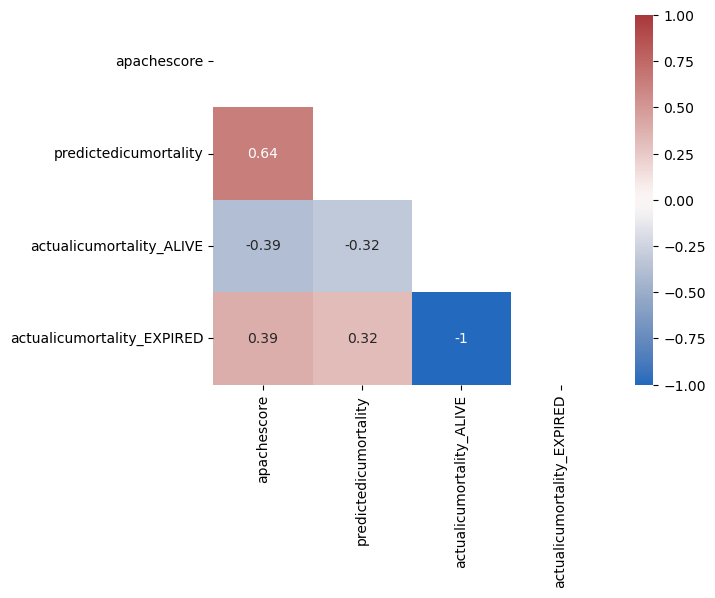

In [57]:
matrix = corrApache.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
print('Correlation of apache scores')
sns.heatmap(matrix, annot=True, vmin = -1, vmax = 1, cmap='vlag', mask=mask)